In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Chaikin's Algorithm

References 
- https://www.cs.unc.edu/~dm/UNC/COMP258/LECTURES/Chaikins-Algorithm.pdf

In [3]:
a = 1 + 1j
b = 2 - 1j

In [4]:
a + b

(3+0j)

In [5]:
(a + b) / 2

(1.5+0j)

In [6]:
.75 * a + .25 * b

(1.25+0.5j)

In [18]:
a = np.array([0+0j, 0+3j, 3+3j, 4-1j, 6+5j])

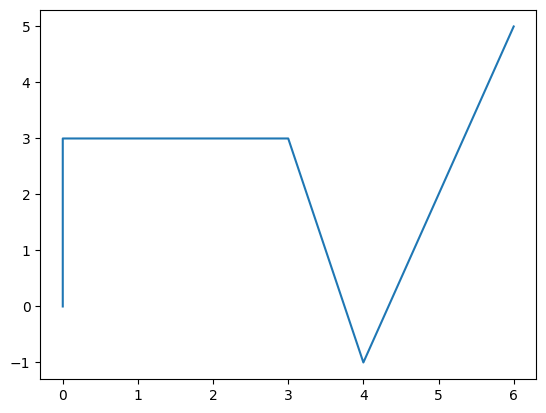

In [34]:
plt.plot(np.real(a), np.imag(a))

In [55]:
b = np.array([0.75 * a[:-1] + 0.25 * a[1:], 
              0.25 * a[:-1] + 0.75 * a[1:]]).flatten('F')

In [56]:
b

array([0.  +0.75j, 0.  +2.25j, 0.75+3.j  , 2.25+3.j  , 3.25+2.j  ,
       3.75+0.j  , 4.5 +0.5j , 5.5 +3.5j ])

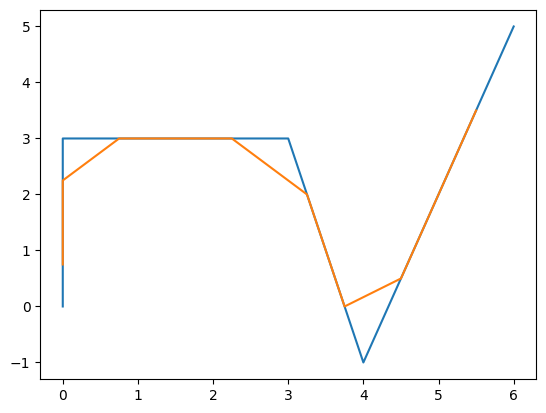

In [57]:
plt.plot(np.real(a), np.imag(a))
plt.plot(np.real(b), np.imag(b))

In [62]:
def chaikin(a: np.array, ratio: float = 0.25, depth: int = 0) -> np.array:
    return np.array([(1 - ratio) * a[:-1] + ratio * a[1:], 
                     ratio * a[:-1] + (1 - ratio) * a[1:]]).flatten('F')

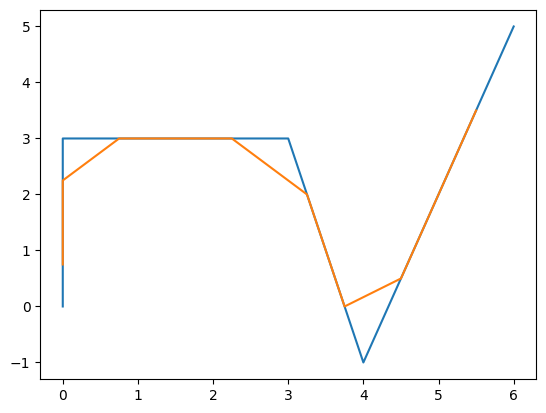

In [63]:
a = np.array([0+0j, 0+3j, 3+3j, 4-1j, 6+5j])
b = chaikin(a)

plt.plot(np.real(a), np.imag(a))
plt.plot(np.real(b), np.imag(b))

In [64]:
# iterative
def chaikin(a: np.array, ratio: float = 0.25, depth: int = 0) -> np.array:
    b = np.array([(1 - ratio) * a[:-1] + ratio * a[1:], 
                  ratio * a[:-1] + (1 - ratio) * a[1:]]).flatten('F')
    if depth > 0:
        return chaikin(b, ratio, depth-1)
    else: 
        return b

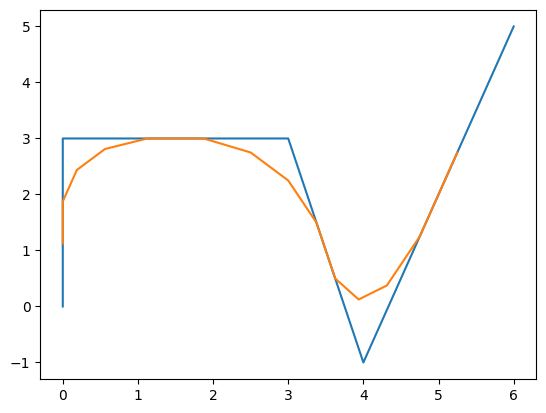

In [67]:
a = np.array([0+0j, 0+3j, 3+3j, 4-1j, 6+5j])
b = chaikin(a, depth=1)

plt.plot(np.real(a), np.imag(a))
plt.plot(np.real(b), np.imag(b))

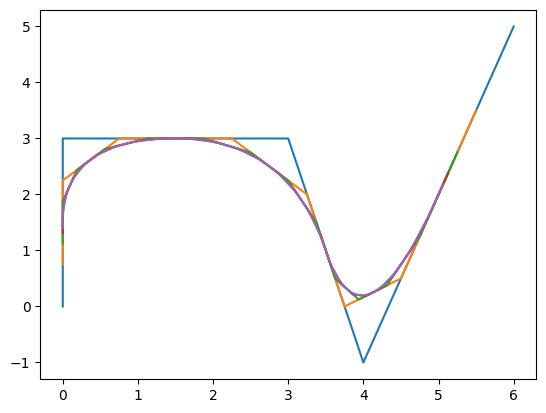

In [70]:
a = np.array([0+0j, 0+3j, 3+3j, 4-1j, 6+5j])
b = chaikin(a, depth=1)

plt.plot(np.real(a), np.imag(a))
for i in range(0, 4):
    plt.plot(np.real(chaikin(a, depth=i)), 
             np.imag(chaikin(a, depth=i)))